In [ ]:
import torch

def create_sliding_windows(data, window_size, shift=1):
    """
    Creates sliding windows from a sequence of data.

    Args:
        data: Input sequence (can be list, numpy array, or torch tensor)
        window_size: Size of each window
        shift: Number of elements to shift each window (stride)

    Returns:
        torch.Tensor: Tensor of shape (num_windows, window_size) containing all windows
    """
    # Convert input to tensor if it isn't already
    if not isinstance(data, torch.Tensor):
        data = torch.tensor(data)

    # Calculate number of valid windows
    n = len(data)
    num_windows = max(0, (n - window_size) // shift + 1)

    # Create strided view of data
    windows = data.unfold(0, window_size, shift)

    return windows

# Example usage:
data = torch.arange(10)
windows = create_sliding_windows(data, window_size=5, shift=1)

# Print each window
for window in windows:
    print(window.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


In [ ]:
import torch

def create_sliding_windows_with_target(data, window_size, shift=1):
    """
    Creates sliding windows from a sequence, splitting each window into features and target.

    Args:
        data: Input sequence (can be list, numpy array, or torch tensor)
        window_size: Size of each window
        shift: Number of elements to shift each window (stride)

    Returns:
        tuple: (features, targets) where:
            - features is a tensor of shape (num_windows, window_size-1)
            - targets is a tensor of shape (num_windows, 1)
    """
    # Convert input to tensor if it isn't already
    if not isinstance(data, torch.Tensor):
        data = torch.tensor(data, dtype=torch.float32)

    # Create windows using unfold
    windows = data.unfold(0, window_size, shift)

    # Split each window into features (all but last element) and target (last element)
    features = windows[:, :-1]  # All elements except the last
    targets = windows[:, -1:]   # Just the last element

    return features, targets

# Example usage:
data = torch.arange(10)
features, targets = create_sliding_windows_with_target(data, window_size=5, shift=1)

# Print each window's features and target
for x, y in zip(features, targets):
    print(f"Features: {x.numpy()}, Target: {y.numpy()}")

Features: [0 1 2 3], Target: [4]
Features: [1 2 3 4], Target: [5]
Features: [2 3 4 5], Target: [6]
Features: [3 4 5 6], Target: [7]
Features: [4 5 6 7], Target: [8]
Features: [5 6 7 8], Target: [9]


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# Create dataset
data = torch.arange(10)
features, targets = create_sliding_windows_with_target(data, window_size=5, shift=1)

# Combine features and targets into a dataset
dataset = TensorDataset(features, targets)

# Create DataLoader with shuffling and batching
batch_size = 2
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Example iteration
for batch_features, batch_targets in dataloader:
    print(f"Batch features shape: {batch_features.shape}")
    print(f"Features:\n{batch_features}")
    print(f"Targets:\n{batch_targets}\n")

Batch features shape: torch.Size([2, 4])
Features:
tensor([[5, 6, 7, 8],
        [2, 3, 4, 5]])
Targets:
tensor([[9],
        [6]])

Batch features shape: torch.Size([2, 4])
Features:
tensor([[1, 2, 3, 4],
        [3, 4, 5, 6]])
Targets:
tensor([[5],
        [7]])

Batch features shape: torch.Size([2, 4])
Features:
tensor([[4, 5, 6, 7],
        [0, 1, 2, 3]])
Targets:
tensor([[8],
        [4]])



In [ ]:
import numpy as np
def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
series = trend(time, 0.1)
baseline = 10
amplitude = 20
slope = 0.09
noise_level = 5

series = baseline + trend(time, slope)
series += seasonality(time, period=365, amplitude=amplitude)
series += noise(time, noise_level, seed=42)

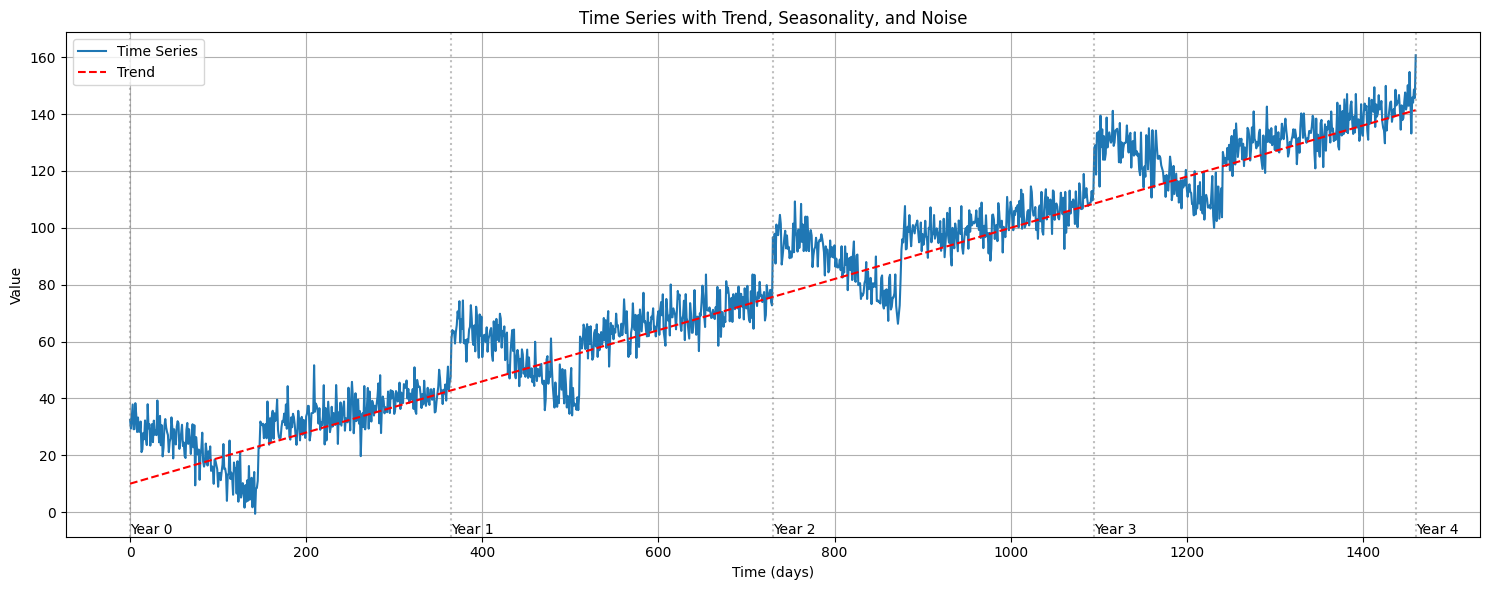

In [ ]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(15, 6))
plt.plot(time, series, label='Time Series')

# Add trend line
trend_line = baseline + trend(time, slope)
plt.plot(time, trend_line, 'r--', label='Trend')

# Customize the plot
plt.title('Time Series with Trend, Seasonality, and Noise')
plt.xlabel('Time (days)')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

# Display year markers
years = 4
for year in range(years + 1):
    plt.axvline(x=year * 365, color='gray', linestyle=':', alpha=0.5)
    plt.text(year * 365, plt.ylim()[0], f'Year {year}',
             verticalalignment='bottom')

plt.tight_layout()
plt.show()

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

def create_sliding_windows_with_target(data, window_size, shift=1):
    """
    Creates sliding windows from a sequence, splitting each window into features and target.
    """
    # Convert input to tensor if it isn't already
    if not isinstance(data, torch.Tensor):
        data = torch.tensor(data, dtype=torch.float32)

    # Create windows using unfold
    windows = data.unfold(0, window_size, shift)

    # Split each window into features (all but last element) and target (last element)
    features = windows[:, :-1]  # All elements except the last
    targets = windows[:, -1:]   # Just the last element

    return features, targets

# Convert the numpy series to a PyTorch tensor
series_tensor = torch.tensor(series, dtype=torch.float32)

# Create windowed dataset with 30-day windows (predicting next day)
window_size = 30
features, targets = create_sliding_windows_with_target(series_tensor, window_size=window_size, shift=1)

# Create PyTorch Dataset and DataLoader
dataset = TensorDataset(features, targets)
batch_size = 32
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Print some information about the dataset
print(f"Series length: {len(series)}")
print(f"Number of windows: {len(features)}")
print(f"Feature shape: {features.shape}")  # Should be (num_windows, window_size-1)
print(f"Target shape: {targets.shape}")    # Should be (num_windows, 1)

# Show a few examples
print("\nFirst few windows:")
for i in range(3):
    print(f"\nWindow {i+1}:")
    print(f"Features (previous {window_size-1} days): {features[i].numpy()}")
    print(f"Target (next day): {targets[i].item():.2f}")

Series length: 1461
Number of windows: 1432
Feature shape: torch.Size([1432, 29])
Target shape: torch.Size([1432, 1])

First few windows:

Window 1:
Features (previous 29 days): [32.48357  29.395714 33.40659  37.858486 29.14184  29.20528  38.32948
 34.322147 28.183279 33.283253 28.287313 28.303862 31.864614 21.104889
 22.057411 27.875519 25.622026 32.25094  26.127428 23.588236 37.95459
 29.468477 30.900469 23.39905  27.755371 30.980967 24.615065 32.186863
 27.23822 ]
Target (next day): 28.71

Window 2:
Features (previous 29 days): [29.395714 33.40659  37.858486 29.14184  29.20528  38.32948  34.322147
 28.183279 33.283253 28.287313 28.303862 31.864614 21.104889 22.057411
 27.875519 25.622026 32.25094  26.127428 23.588236 37.95459  29.468477
 30.900469 23.39905  27.755371 30.980967 24.615065 32.186863 27.23822
 28.710733]
Target (next day): 27.08

Window 3:
Features (previous 29 days): [33.40659  37.858486 29.14184  29.20528  38.32948  34.322147 28.183279
 33.283253 28.287313 28.303862 3

Original series length: 1461
Total number of windows: 1432
Training windows: 971
Validation windows: 461

Example Training Batch:
Batch shape - Features: torch.Size([32, 29]), Targets: torch.Size([32, 1])

Example Validation Batch:
Batch shape - Features: torch.Size([32, 29]), Targets: torch.Size([32, 1])


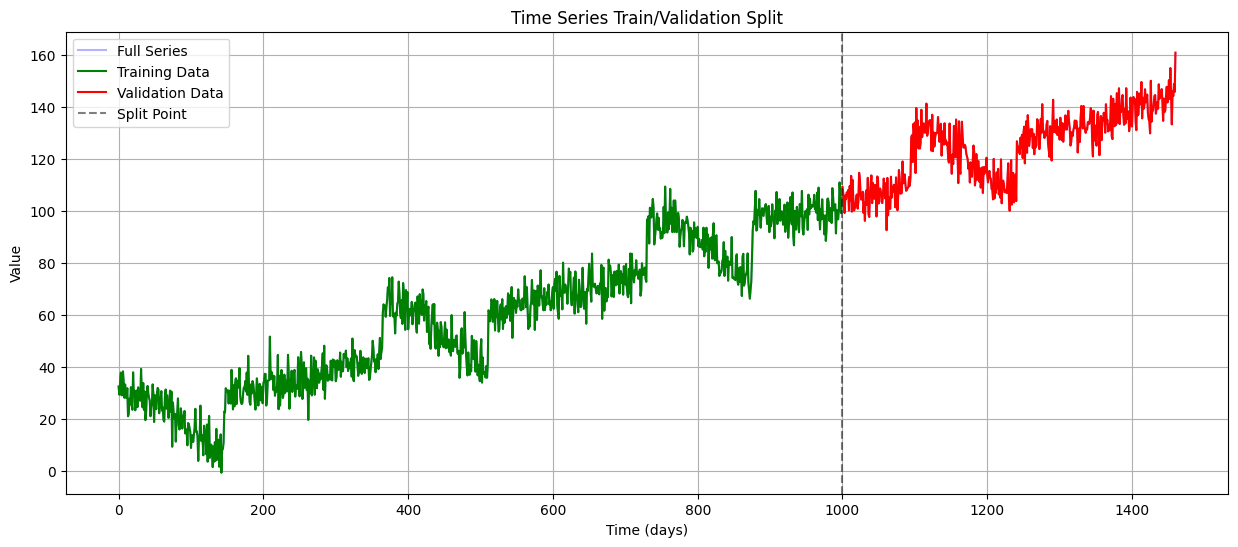

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, Subset
import numpy as np

# First create the full windowed dataset
series_tensor = torch.tensor(series, dtype=torch.float32)
window_size = 30
features, targets = create_sliding_windows_with_target(series_tensor, window_size=window_size, shift=1)

# Create the full dataset
full_dataset = TensorDataset(features, targets)

# Calculate split indices
# Note: Since we're using windows, we need to account for the overlap
# The index 1000 in the original series will correspond to a different window index
train_size = 1000 - window_size + 1  # Adjust for window overlap
total_windows = len(full_dataset)
train_indices = list(range(train_size))
val_indices = list(range(train_size, total_windows))

# Create training and validation datasets using Subset
train_dataset = Subset(full_dataset, train_indices)
val_dataset = Subset(full_dataset, val_indices)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Print information about the splits
print(f"Original series length: {len(series)}")
print(f"Total number of windows: {total_windows}")
print(f"Training windows: {len(train_dataset)}")
print(f"Validation windows: {len(val_dataset)}")

# Show example batch from each
print("\nExample Training Batch:")
train_features, train_targets = next(iter(train_loader))
print(f"Batch shape - Features: {train_features.shape}, Targets: {train_targets.shape}")

print("\nExample Validation Batch:")
val_features, val_targets = next(iter(val_loader))
print(f"Batch shape - Features: {val_features.shape}, Targets: {val_targets.shape}")

# Visualize the split point
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(range(len(series)), series, 'b-', label='Full Series', alpha=0.3)
plt.plot(range(1000), series[:1000], 'g-', label='Training Data')
plt.plot(range(1000, len(series)), series[1000:], 'r-', label='Validation Data')
plt.axvline(x=1000, color='k', linestyle='--', alpha=0.5, label='Split Point')
plt.title('Time Series Train/Validation Split')
plt.xlabel('Time (days)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
features, target = train_dataset[0]
print("First window:")
print(f"Features shape: {features.shape}")
print(f"Features: {features.numpy()}")
print(f"Target: {target.item()}\n")

First window:
Features shape: torch.Size([29])
Features: [32.48357  29.395714 33.40659  37.858486 29.14184  29.20528  38.32948
 34.322147 28.183279 33.283253 28.287313 28.303862 31.864614 21.104889
 22.057411 27.875519 25.622026 32.25094  26.127428 23.588236 37.95459
 29.468477 30.900469 23.39905  27.755371 30.980967 24.615065 32.186863
 27.23822 ]
Target: 28.71073341369629



Epoch [10/100], Train Loss: 51.6220, Val Loss: 49.3996
Epoch [20/100], Train Loss: 43.0714, Val Loss: 37.5284
Epoch [30/100], Train Loss: 38.7168, Val Loss: 37.4312
Epoch [40/100], Train Loss: 37.0717, Val Loss: 33.5657
Epoch [50/100], Train Loss: 35.1246, Val Loss: 35.1154
Epoch [60/100], Train Loss: 34.2536, Val Loss: 34.6928
Epoch [70/100], Train Loss: 33.7386, Val Loss: 33.2802
Epoch [80/100], Train Loss: 34.4039, Val Loss: 32.8982
Epoch [90/100], Train Loss: 35.6039, Val Loss: 33.5393
Epoch [100/100], Train Loss: 32.9797, Val Loss: 34.5242


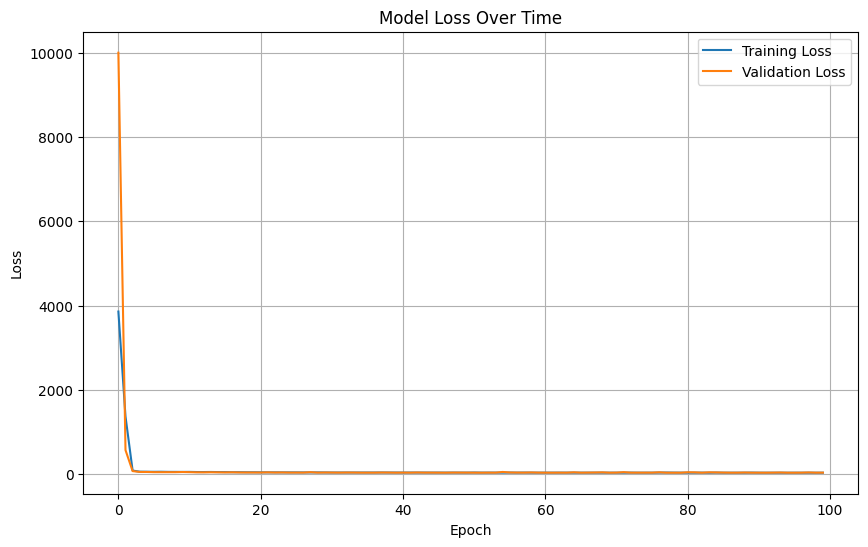

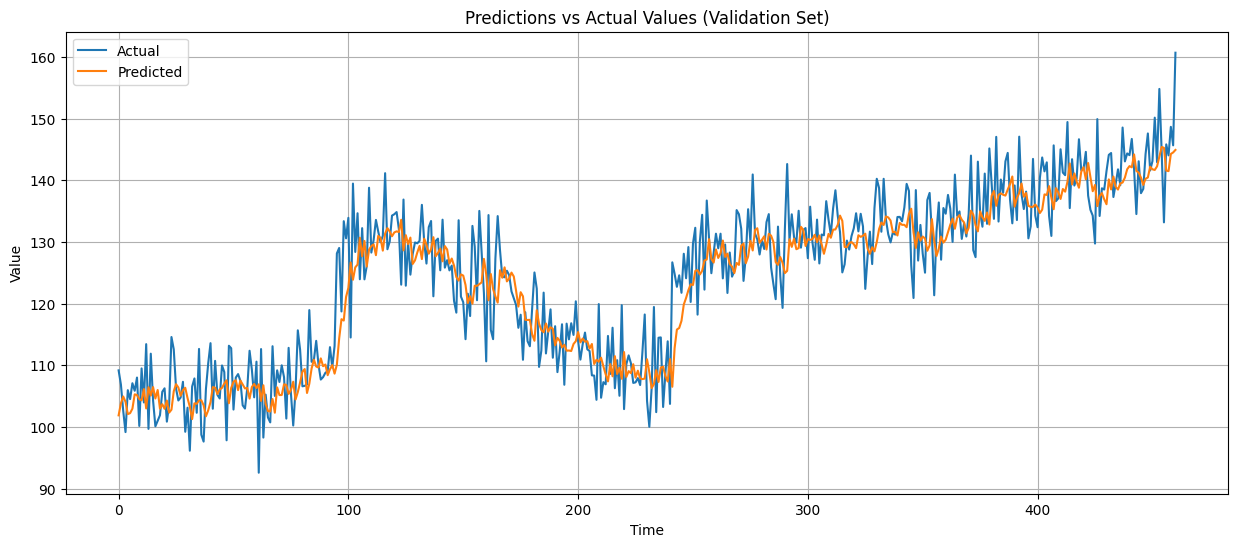

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model
class TimeSeriesModel(nn.Module):
    def __init__(self, window_size):
        super(TimeSeriesModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(window_size-1, 10),  # window_size-1 because our features are window_size-1
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.network(x)

# Initialize model, loss function, and optimizer
model = TimeSeriesModel(window_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Training loop
num_epochs = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Lists to store losses for plotting
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0
    for batch_features, batch_targets in train_loader:
        batch_features = batch_features.to(device)
        batch_targets = batch_targets.to(device)

        # Forward pass
        outputs = model(batch_features)
        loss = criterion(outputs, batch_targets)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Validation phase
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_features, batch_targets in val_loader:
            batch_features = batch_features.to(device)
            batch_targets = batch_targets.to(device)

            outputs = model(batch_features)
            val_loss += criterion(outputs, batch_targets).item()

    # Calculate average losses
    train_loss /= len(train_loader)
    val_loss /= len(val_loader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {train_loss:.4f}, '
              f'Val Loss: {val_loss:.4f}')



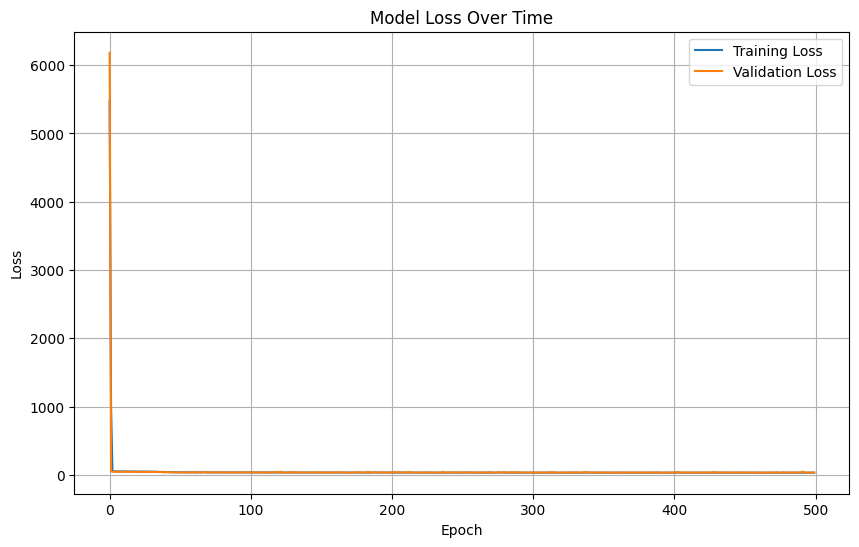

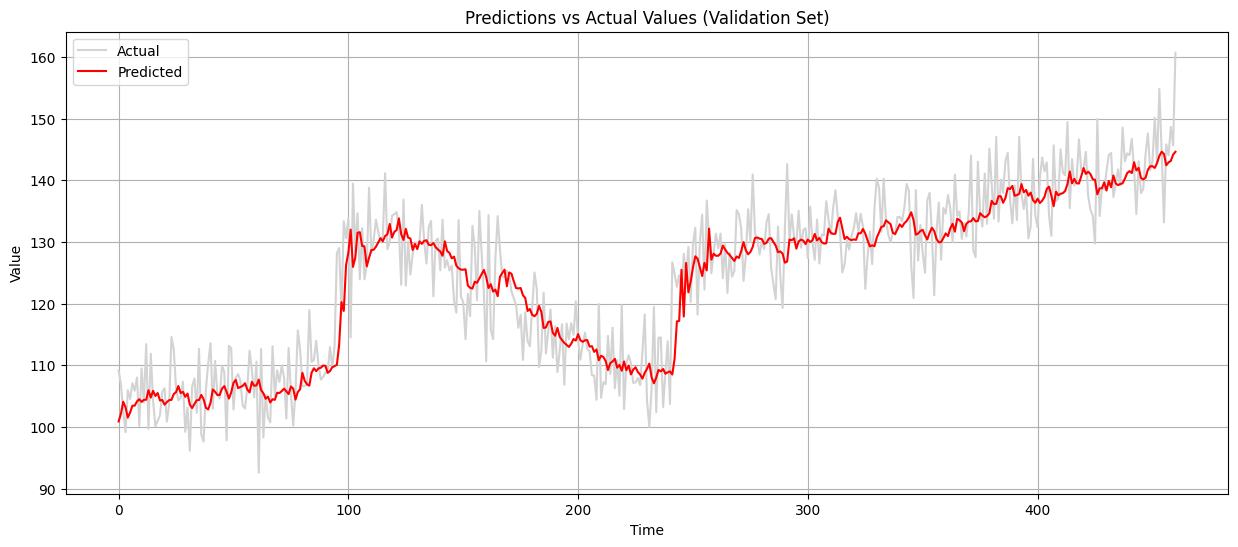

In [ ]:
# Plot training progress
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Make predictions
model.eval()
with torch.no_grad():
    # Get predictions for validation set
    val_predictions = []
    val_targets = []
    for batch_features, batch_targets in val_loader:
        batch_features = batch_features.to(device)
        outputs = model(batch_features)
        val_predictions.extend(outputs.cpu().numpy())
        val_targets.extend(batch_targets.numpy())

# Plot predictions vs actual for validation set
plt.figure(figsize=(15, 6))
plt.plot(val_targets, label='Actual', color="lightgrey")
plt.plot(val_predictions, label='Predicted', color="red")
plt.title('Predictions vs Actual Values (Validation Set)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

val_predictions_tensor = torch.tensor(val_predictions)
val_targets_tensor = torch.tensor(val_targets)
mae_torch = torch.mean(torch.abs(val_predictions_tensor - val_targets_tensor))
print(f"Validation MAE (PyTorch): {mae_torch:.4f}")



Validation MAE (PyTorch): 4.3663


Epoch [10/500], Train Loss: 48.9169, Val Loss: 43.8280, Learning Rate: 0.001000
Epoch [20/500], Train Loss: 47.3232, Val Loss: 42.6163, Learning Rate: 0.001000
Epoch [30/500], Train Loss: 45.4020, Val Loss: 41.2373, Learning Rate: 0.001000
Epoch [40/500], Train Loss: 40.1717, Val Loss: 36.4384, Learning Rate: 0.001000
Epoch [50/500], Train Loss: 36.5882, Val Loss: 35.0594, Learning Rate: 0.001000
Epoch [60/500], Train Loss: 36.9354, Val Loss: 43.3411, Learning Rate: 0.001000
Epoch [70/500], Train Loss: 34.8657, Val Loss: 34.6337, Learning Rate: 0.001000
Epoch [80/500], Train Loss: 34.1346, Val Loss: 37.7554, Learning Rate: 0.001000
Epoch [90/500], Train Loss: 33.5468, Val Loss: 35.0031, Learning Rate: 0.001000
Epoch [100/500], Train Loss: 34.4220, Val Loss: 33.8812, Learning Rate: 0.001000
Epoch [110/500], Train Loss: 33.2526, Val Loss: 34.3930, Learning Rate: 0.001000
Epoch [120/500], Train Loss: 33.8420, Val Loss: 34.4179, Learning Rate: 0.001000
Epoch [130/500], Train Loss: 32.7037,

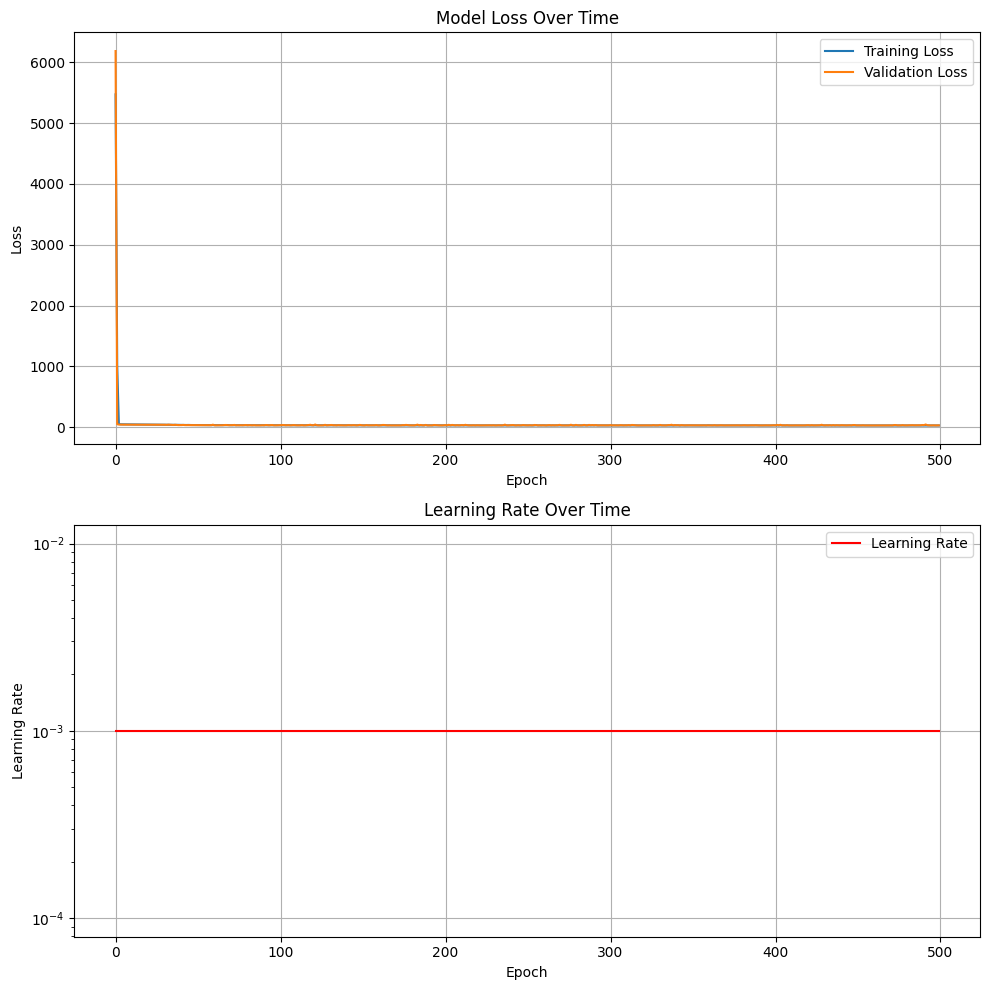

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

# Define the model (same as before)
class TimeSeriesModel(nn.Module):
   def __init__(self, window_size):
       super(TimeSeriesModel, self).__init__()
       self.network = nn.Sequential(
           nn.Linear(window_size-1, 10),
           nn.ReLU(),
           nn.Linear(10, 10),
           nn.ReLU(),
           nn.Linear(10, 1)
       )

   def forward(self, x):
       return self.network(x)

# Initialize model, loss function, and optimizer
model = TimeSeriesModel(window_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Start with higher learning rate

# Add scheduler - several options:
#scheduler = lr_scheduler.StepLR(optimizer, step_size=100, gamma=.1)


# Training loop with scheduler
num_epochs = 500
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
learning_rates = []  # To track learning rate changes

for epoch in range(num_epochs):
   # Training phase
   model.train()
   train_loss = 0
   for batch_features, batch_targets in train_loader:
       batch_features = batch_features.to(device)
       batch_targets = batch_targets.to(device)

       optimizer.zero_grad()
       outputs = model(batch_features)
       loss = criterion(outputs, batch_targets)
       loss.backward()
       optimizer.step()

       # If using OneCycleLR, step the scheduler here
       # scheduler.step()

       train_loss += loss.item()

   # Validation phase
   model.eval()
   val_loss = 0
   with torch.no_grad():
       for batch_features, batch_targets in val_loader:
           batch_features = batch_features.to(device)
           batch_targets = batch_targets.to(device)
           outputs = model(batch_features)
           val_loss += criterion(outputs, batch_targets).item()

   train_loss /= len(train_loader)
   val_loss /= len(val_loader)

   # Step the scheduler
   #if isinstance(scheduler, lr_scheduler.ReduceLROnPlateau):
   #    scheduler.step(val_loss)  # For ReduceLROnPlateau
   #else:
   #    scheduler.step()  # For other schedulers

   # Record the learning rate
   current_lr = optimizer.param_groups[0]['lr']
   learning_rates.append(current_lr)

   train_losses.append(train_loss)
   val_losses.append(val_loss)

   if (epoch + 1) % 10 == 0:
       print(f'Epoch [{epoch+1}/{num_epochs}], '
             f'Train Loss: {train_loss:.4f}, '
             f'Val Loss: {val_loss:.4f}, '
             f'Learning Rate: {current_lr:.6f}')

# Plot training progress and learning rate
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot losses
ax1.plot(train_losses, label='Training Loss')
ax1.plot(val_losses, label='Validation Loss')
ax1.set_title('Model Loss Over Time')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# Plot learning rate
ax2.plot(learning_rates, label='Learning Rate', color='r')
ax2.set_title('Learning Rate Over Time')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Learning Rate')
ax2.set_yscale('log')  # Log scale for better visualization
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.4 MB/s eta 0:00:00


In [ ]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim

def create_model(trial):
    """Create model with hyperparameters suggested by Optuna"""
    # Define hyperparameters to search
    n_hidden = trial.suggest_int('n_hidden', 5, 50)  # Number of hidden units
    n_layers = trial.suggest_int('n_layers', 1, 3)   # Number of hidden layers
    lr = trial.suggest_float('lr', 1e-4, 1e-1, log=True)  # Learning rate
    dropout = trial.suggest_float('dropout', 0.0, 0.5)    # Dropout rate

    # Create model
    class TimeSeriesModel(nn.Module):
        def __init__(self):
            super(TimeSeriesModel, self).__init__()
            layers = []
            in_features = window_size - 1

            # Input layer
            for i in range(n_layers):
                layers.append(nn.Linear(in_features, n_hidden))
                layers.append(nn.ReLU())
                layers.append(nn.Dropout(dropout))
                in_features = n_hidden

            # Output layer
            layers.append(nn.Linear(n_hidden, 1))

            self.network = nn.Sequential(*layers)

        def forward(self, x):
            return self.network(x)

    return TimeSeriesModel(), lr

def objective(trial):
    """Optuna objective function to minimize"""
    # Create model and optimizer with trial hyperparameters
    model, lr = create_model(trial)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Train the model
    model.to(device)

    for epoch in range(20):  # Reduced epochs for faster tuning
        # Training
        model.train()
        train_loss = 0
        for batch_features, batch_targets in train_loader:
            batch_features = batch_features.to(device)
            batch_targets = batch_targets.to(device)

            optimizer.zero_grad()
            outputs = model(batch_features)
            loss = nn.MSELoss()(outputs, batch_targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch_features, batch_targets in val_loader:
                batch_features = batch_features.to(device)
                batch_targets = batch_targets.to(device)
                outputs = model(batch_features)
                val_loss += nn.MSELoss()(outputs, batch_targets).item()

        val_loss /= len(val_loader)

        # Report intermediate value for pruning
        trial.report(val_loss, epoch)

        # Handle pruning based on the intermediate value
        if trial.should_prune():
            raise optuna.TrialPruned()

    return val_loss

# Create study and optimize
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)  # Try 50 different hyperparameter combinations

# Print results
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Visualize the optimization results
print("\nPlotting optimization results...")
try:
    # Plot optimization history
    optuna.visualization.plot_optimization_history(study)

    # Plot parameter importance
    optuna.visualization.plot_param_importances(study)

    # Plot parameter relationships
    optuna.visualization.plot_parallel_coordinate(study)
except:
    print("Visualization requires plotly to be installed")

# Create final model with best parameters
best_model, best_lr = create_model(trial)
best_model.to(device)
best_optimizer = optim.Adam(best_model.parameters(), lr=best_lr)

print("\nBest model architecture:")
print(best_model)

[I 2024-11-05 21:54:05,868] A new study created in memory with name: no-name-f4dd94d8-6d24-463b-bce1-ad993a1f61f2
[I 2024-11-05 21:54:09,503] Trial 0 finished with value: 71.43539148966471 and parameters: {'n_hidden': 28, 'n_layers': 1, 'lr': 0.00025358905789149756, 'dropout': 0.29797435693695073}. Best is trial 0 with value: 71.43539148966471.
[I 2024-11-05 21:54:13,796] Trial 1 finished with value: 2076.40869140625 and parameters: {'n_hidden': 48, 'n_layers': 3, 'lr': 0.004249122806250073, 'dropout': 0.3276365667870067}. Best is trial 0 with value: 71.43539148966471.
[I 2024-11-05 21:54:15,237] Trial 2 finished with value: 5264.428922526042 and parameters: {'n_hidden': 50, 'n_layers': 2, 'lr': 0.07148497912978999, 'dropout': 0.37761509188897385}. Best is trial 0 with value: 71.43539148966471.
[I 2024-11-05 21:54:16,674] Trial 3 finished with value: 197.2809092203776 and parameters: {'n_hidden': 49, 'n_layers': 2, 'lr': 0.0012690907187005184, 'dropout': 0.16458381581095594}. Best is t

Best trial:
  Value:  32.59354756673177
  Params: 
    n_hidden: 37
    n_layers: 1
    lr: 0.021166290062218283
    dropout: 0.21207734910703507

Plotting optimization results...

Best model architecture:
TimeSeriesModel(
  (network): Sequential(
    (0): Linear(in_features=29, out_features=37, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.21207734910703507, inplace=False)
    (3): Linear(in_features=37, out_features=1, bias=True)
  )
)
